In [1]:
####   
#Fz Einfluss auf Reifenmodelle
####

import numpy as np
import matplotlib.pyplot as plt

import sys
import os
sys.path.insert(0, os.path.abspath('../model'))

import Pacejka52 as pa52
import fiala as fi
import Brush as br
import TMeasy as tm
import Dugoff as du
import Pacejka52_glSA as pa52gl

sys.path.insert(0, os.path.abspath('../model/parameter'))
import Pacejka_Params_Indy as pa
import Params_fit_at_Pa52 as pam

i=500
Sx = np.linspace(0,1,i)
Sy = np.linspace(0,0.3,i)
Fz0 = 3114
IA = 0

iter = 500 #
Fz = np.linspace(1500,5000,iter)


In [2]:
#Vergleichsgrößen

def Fy_intervall(y,Fz,Fy_intv): #Fz in [kN], Fx_intv in % (z.b 10% von Fx_max)
#x Position von Fx_max berechnene
    Fy_w=y
    w=len(Fy_w)
    Sy_max_pos=0
    for j in range(0,w):
        if Fy_w[j] == np.max(y):
            break
        else:
            Sy_max_pos = Sy_max_pos + 1

    #cut slop
    Fy_w_pos_max=Fy_w[0:((Sy_max_pos)+1)] #von 0 bis Fx_max
    Fy_w_max_end=Fy_w[((Sy_max_pos)+1)::] #von Fx_max bis Ende(+100% slipratio)

    Fy_max_ref = np.max(y) * Fy_intv #Referenzwert Fx 10% weniger als Fx_max

    left=0
    j=0
    for j in range(0,len(Fy_w_pos_max)):
        if Fy_w_pos_max[j] < Fy_max_ref:
            left +=1
        else:
            break
        
    right = 0
    j=0
    for j in range(0,len(Fy_w_max_end)):
        if Fy_w_max_end[j] > Fy_max_ref:
            right +=1
        else:
            break
        
#Intervall 10% abweichung von Fx_max = [left,right]
    Fy_max_10=Fy_w[left:len(Fy_w_pos_max)+right]
    Fy_slope_b=((len(Fy_w_pos_max)+right)-left) / len(Fy_w) * 0.3#breite des Intervalls in %Schlupf
    
    l = left /i * 0.3
    r = (len(Fy_w_pos_max) + right)/ i * 0.3
    return Fy_slope_b,Fy_max_10,l,r

def Fx_intervall(y,Fz,Fx_intv): #Fz in [kN], Fx_intv in % (z.b 10% von Fx_max)
#x Position von Fx_max berechnene
    Fx_w=y
    w=len(Fx_w)
    Sx_max_pos=0
    for j in range(0,w):
        if Fx_w[j] == np.max(y):
            break
        else:
            Sx_max_pos = Sx_max_pos + 1

    #cut slop
    Fx_w_pos_max=Fx_w[0:((Sx_max_pos)+1)] #von 0 bis Fx_max
    Fx_w_max_end=Fx_w[((Sx_max_pos)+1)::] #von Fx_max bis Ende(+100% slipratio)

    Fx_max_ref = np.max(y) * Fx_intv #Referenzwert Fx 10% weniger als Fx_max

    left=0
    j=0
    for j in range(0,len(Fx_w_pos_max)):
        if Fx_w_pos_max[j] < Fx_max_ref:
            left +=1
        else:
            break
        
    right = 0
    j=0
    for j in range(0,len(Fx_w_max_end)):
        if Fx_w_max_end[j] > Fx_max_ref:
            right +=1
        else:
            break
        
#Intervall 10% abweichung von Fx_max = [left,right]
    Fx_max_10=Fx_w[left:len(Fx_w_pos_max)+right]
    Fx_slope_b=((len(Fx_w_pos_max)+right)-left) / len(Fx_w) #breite des Intervalls in %Schlupf
    
    l = left /i 
    r = (len(Fx_w_pos_max) + right)/ i 
    return Fx_slope_b,Fx_max_10,l,r


#ableiten
def diff_Pacejka(y,SL): #y = Funktion die abgleitet werden soll, Sl = linspace
    dx = SL[1]-SL[0]
    dydx = np.gradient(y, dx)
    return dydx



4665.109756333515
4664.16757889698
4663.925880835989


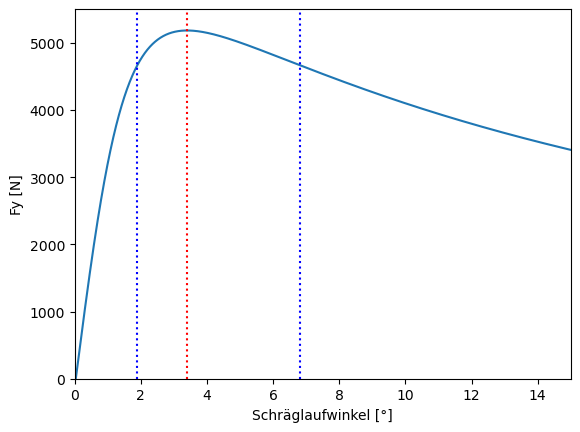

In [6]:
Fz = 3000
Sy = np.linspace(0,0.3,10000)
Sy1 = np.linspace(0,15,10000)
Fy = pa52.Pacejka52_long(Fz,Sy,IA,Fz0)[0]
Fmax = np.max(Fy)

FmaxS = np.argmax(Fy) / 10000 * 15
left = 0
for j in range(0,len(Fy)):
    if Fy[j] < Fmax*0.9:
        left +=1
    else:
        break
right = 0
for j in range(left+1,len(Fy)):
    if Fy[j] > Fmax*0.9:
        right +=1
    else:
        break

l = left/10000 *15
r = (left + right)/10000 *15
print(Fy[left])
print(Fy[(left + right)])
print(Fmax * 0.9)
plt.plot(Sy1,Fy)
plt.xlim(0,15)
plt.ylim(0,5500)
plt.xlabel('Schräglaufwinkel [°]')
plt.ylabel('Fy [N]')


plt.axvline(x = FmaxS, color='r', linestyle='dotted')
plt.axvline(x = l, color='b', linestyle='dotted')
plt.axvline(x = r, color='b', linestyle='dotted')

(1500.0, 5000.0)

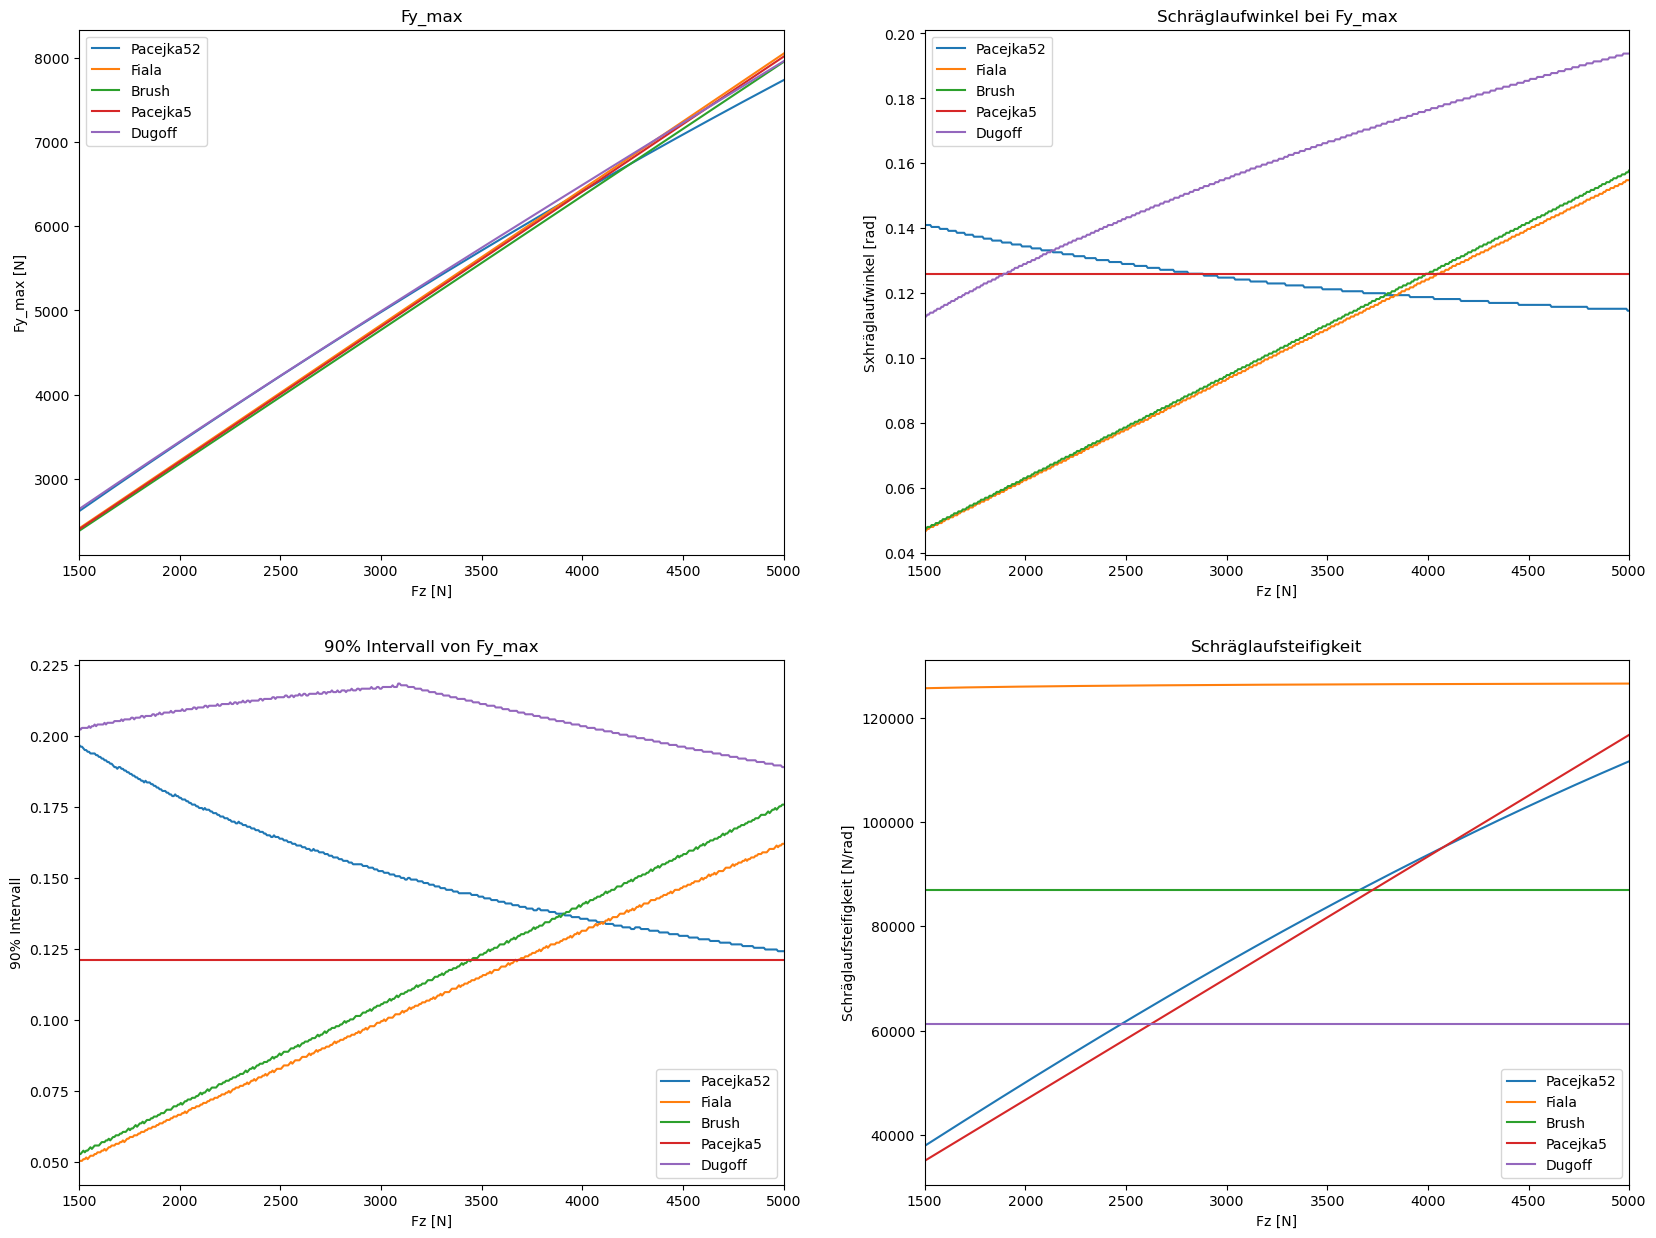

In [4]:
IA = 0
Fz0 = 3114

#Fy_max
fig, ax = plt.subplots(2,2, figsize =(20,15))
Fy_max_pa = np.zeros(len(Fz))
Fy_max_fiala = np.zeros(len(Fz))
Fy_max_brush = np.zeros(len(Fz))
Fy_max_pa5 = np.zeros(len(Fz))
Fy_max_dugoff = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fy_max_pa[j] = np.max(pa52.Pacejka52_lat(Fz[j],Sy,IA,Fz0)[0])
    Fy_max_fiala[j] = np.max(fi.fiala_lat(Sy,Fz[j],pam.fi_C_lat,pam.fi_mu1,pam.fi_mu2))
    Fy_max_brush[j] = np.max(br.brush_lat(Sy, Fz[j], pam.mu_b_lat, pam.Ca_b_lat, pam.lam_b_lat))
    Fy_max_pa5[j] = np.max(pa52.Pacejka5_lat_pa(Sy,Fz[j],pam.B_lat,pam.C_lat,pam.D_lat,pam.E_lat))
    Fy_max_dugoff[j] = np.max(du.dugoff_lat(Sx,Sy,Fz[j],pam.Cs_lat,pam.Ca_lat,pam.mu_lat))
ax[0,0].plot(Fz,Fy_max_pa, label = 'Pacejka52')
ax[0,0].plot(Fz,Fy_max_fiala, label = 'Fiala')
ax[0,0].plot(Fz,Fy_max_brush, label = 'Brush')
ax[0,0].plot(Fz,Fy_max_pa5, label = 'Pacejka5')
ax[0,0].plot(Fz,Fy_max_dugoff, label = 'Dugoff')
ax[0,0].legend()
ax[0,0].set_xlabel('Fz [N]')
ax[0,0].set_ylabel('Fy_max [N]')
ax[0,0].set_title('Fy_max')
ax[0,0].set_xlim(1500,5000)

#Slip at Fy_max
Fy_max_pa = np.zeros(len(Fz))
Fy_max_fiala = np.zeros(len(Fz))
Fy_max_brush = np.zeros(len(Fz))
Fy_max_pa5 = np.zeros(len(Fz))
Fy_max_dugoff = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fy_max_pa[j] = np.argmax(pa52.Pacejka52_lat(Fz[j],Sy,IA,Fz0)[0])   / i * 0.3 
    Fy_max_fiala[j] = np.argmax(fi.fiala_lat(Sy,Fz[j],pam.fi_C_lat,pam.fi_mu1,pam.fi_mu2))/ i * 0.3 
    Fy_max_brush[j] = np.argmax(br.brush_lat(Sy, Fz[j], pam.mu_b_lat, pam.Ca_b_lat, pam.lam_b_lat))/ i * 0.3
    Fy_max_pa5[j] = np.argmax(pa52.Pacejka5_lat_pa(Sy,Fz[j],pam.B_lat,pam.C_lat,pam.D_lat,pam.E_lat))/ i * 0.33  
    Fy_max_dugoff[j] = np.argmax(du.dugoff_lat(Sx,Sy,Fz[j],pam.Cs_lat,pam.Ca_lat,pam.mu_lat))/ i * 0.3
ax[0,1].plot(Fz,Fy_max_pa, label = 'Pacejka52')
ax[0,1].plot(Fz,Fy_max_fiala, label = 'Fiala')
ax[0,1].plot(Fz,Fy_max_brush, label = 'Brush')
ax[0,1].plot(Fz,Fy_max_pa5, label = 'Pacejka5')
ax[0,1].plot(Fz,Fy_max_dugoff, label = 'Dugoff')
ax[0,1].legend()
ax[0,1].set_xlabel('Fz [N]')
ax[0,1].set_ylabel('Sxhräglaufwinkel [rad]')
ax[0,1].set_title('Schräglaufwinkel bei Fy_max')
ax[0,1].set_xlim(1500,5000)

#90% intervall
Fy_max_pa = np.zeros(len(Fz))
Fy_max_fiala = np.zeros(len(Fz))
Fy_max_brush = np.zeros(len(Fz))
Fy_max_pa5 = np.zeros(len(Fz))
Fy_max_dugoff = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fy_max_pa[j] = Fy_intervall(pa52.Pacejka52_lat(Fz[j],Sy,IA,Fz0)[0],Fz[j],0.9)[0]
    Fy_max_fiala[j] = Fy_intervall(fi.fiala_lat(Sy,Fz[j],pam.fi_C_lat,pam.fi_mu1,pam.fi_mu2),Fz[j],0.9)[0]
    Fy_max_brush[j] = Fy_intervall(br.brush_lat(Sy, Fz[j], pam.mu_b_lat, pam.Ca_b_lat, pam.lam_b_lat),Fz[j],0.9)[0]
    Fy_max_pa5[j] = Fy_intervall(pa52.Pacejka5_lat_pa(Sy,Fz[j],pam.B_lat,pam.C_lat,pam.D_lat,pam.E_lat),Fz[j],0.9)[0] 
    Fy_max_dugoff[j] = Fy_intervall(du.dugoff_lat(Sx,Sy,Fz[j],pam.Cs_lat,pam.Ca_lat,pam.mu_lat),Fz[j],0.9)[0] 
ax[1,0].plot(Fz,Fy_max_pa, label = 'Pacejka52')
ax[1,0].plot(Fz,Fy_max_fiala, label = 'Fiala')
ax[1,0].plot(Fz,Fy_max_brush, label = 'Brush')
ax[1,0].plot(Fz,Fy_max_pa5, label = 'Pacejka5')
ax[1,0].plot(Fz,Fy_max_dugoff, label = 'Dugoff')
ax[1,0].legend()
ax[1,0].set_xlabel('Fz [N]')
ax[1,0].set_ylabel('90% Intervall')
ax[1,0].set_title('90% Intervall von Fy_max')
ax[1,0].set_xlim(1500,5000)

#Schräglaufsteifigkeit

B_lat = -9.06434405
C_lat = 1.60162373
D_lat = -1.72069169
E_lat = -0.80265574

Fy_max_pa = np.zeros(len(Fz))
Fy_max_fiala = np.zeros(len(Fz))
Fy_max_brush = np.zeros(len(Fz))
Fy_max_pa5 = np.zeros(len(Fz))
Fy_max_dugoff = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fy_max_pa[j] = diff_Pacejka(pa52.Pacejka52_lat(Fz[j],Sy,IA,Fz0)[0],Sy)[0]
    Fy_max_fiala[j] = diff_Pacejka(fi.fiala_lat(Sy,Fz[j],pam.fi_C_lat,pam.fi_mu1,pam.fi_mu2),Sy)[0]
    Fy_max_brush[j] = diff_Pacejka(br.brush_lat(Sy, Fz[j], pam.mu_b_lat, pam.Ca_b_lat, pam.lam_b_lat),Sy)[0]
    Fy_max_pa5[j] = diff_Pacejka(pa52.Pacejka5_lat_pa(Sy,Fz[j],pam.B_lat,pam.C_lat,pam.D_lat,pam.E_lat),Sy)[0]
    Fy_max_dugoff[j] = diff_Pacejka(du.dugoff_lat(Sx,Sy,Fz[j],pam.Cs_lat,pam.Ca_lat,pam.mu_lat),Sy)[0]
ax[1,1].plot(Fz,Fy_max_pa, label = 'Pacejka52')
ax[1,1].plot(Fz,Fy_max_fiala, label = 'Fiala')
ax[1,1].plot(Fz,Fy_max_brush, label = 'Brush')
ax[1,1].plot(Fz,Fy_max_pa5, label = 'Pacejka5')
ax[1,1].plot(Fz,Fy_max_dugoff, label = 'Dugoff')
ax[1,1].legend()
ax[1,1].set_xlabel('Fz [N]')
ax[1,1].set_ylabel('Schräglaufsteifigkeit [N/rad]')
ax[1,1].set_title('Schräglaufsteifigkeit')
ax[1,1].set_xlim(1500,5000)

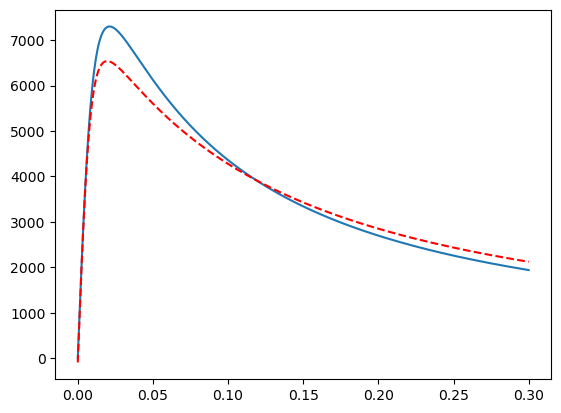

In [6]:
# spax valdidierung

Fy_pa5 = pa52.Pacejka5_long_pa(Sx,4000,pam.B_long,pam.C_long,pam.D_long,pam.E_long)
Fy_pa52 = pa52.Pacejka52_long(4000, Sx, IA, 3114)[0]

plt.plot(Sy, Fy_pa5)
plt.plot(Sy, Fy_pa52, 'r--')


(1500.0, 5000.0)

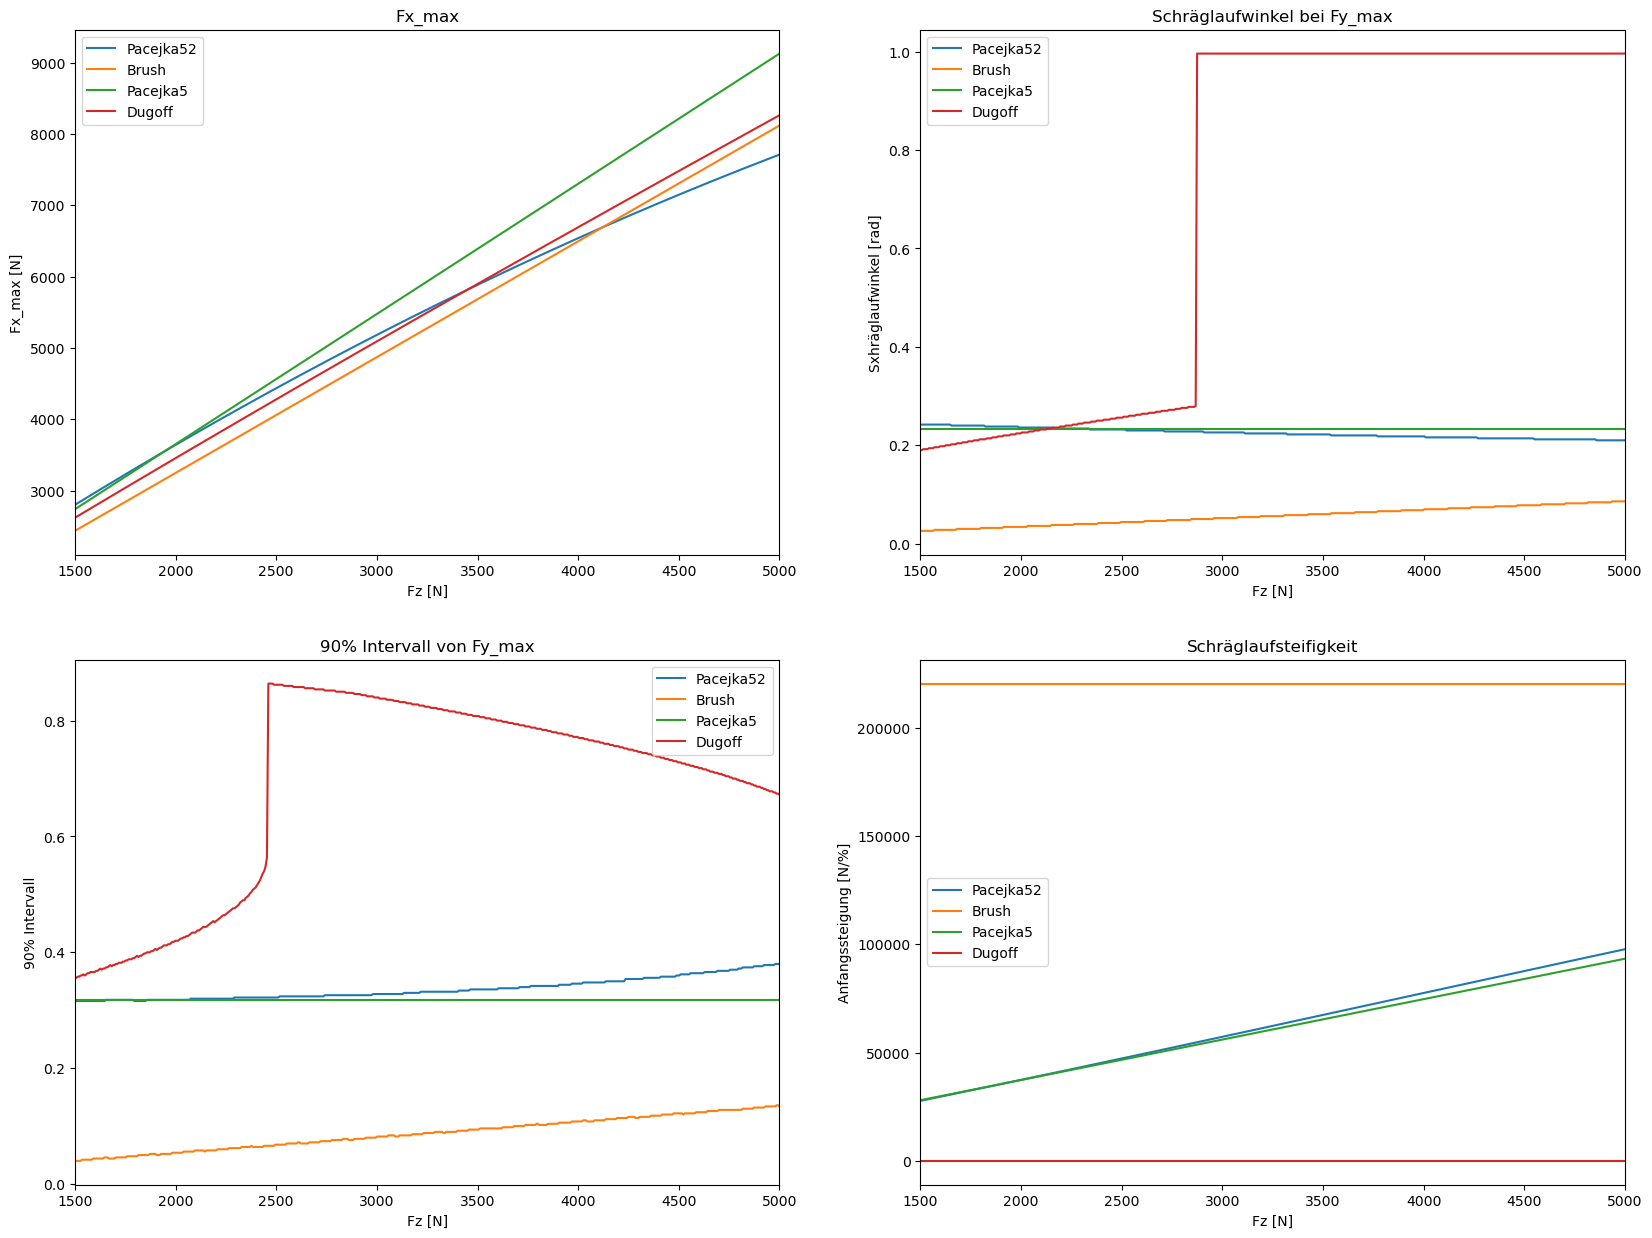

In [ ]:
IA = 0
Fz0 = 3114

#Fy_max
fig, ax = plt.subplots(2,2, figsize =(20,15))
Fx_max_pa = np.zeros(len(Fz))
Fx_max_brush = np.zeros(len(Fz))
Fx_max_pa5 = np.zeros(len(Fz))
Fx_max_dugoff = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fx_max_pa[j] = np.max(pa52.Pacejka52_long(Fz[j],Sx,IA,Fz0)[0])
    Fx_max_brush[j] = np.max(br.brush_long(Sx,Fz[j],pam.mu_b_long,pam.kt_b_long,pam.lam_b_long))
    Fx_max_pa5[j] = np.max(pa52.Pacejka5_long_pa(Sx,Fz[j],pam.B_long,pam.C_long,pam.D_long,pam.E_long))
    Fx_max_dugoff[j] = np.max(du.dugoff_long(Sx,Sy,Fz[j],pam.Cs_long,pam.Ca_long,pam.mu_long))
ax[0,0].plot(Fz,Fx_max_pa, label = 'Pacejka52')
ax[0,0].plot(Fz,Fx_max_brush, label = 'Brush')
ax[0,0].plot(Fz,Fx_max_pa5, label = 'Pacejka5')
ax[0,0].plot(Fz,Fx_max_dugoff, label = 'Dugoff')
ax[0,0].legend()
ax[0,0].set_xlabel('Fz [N]')
ax[0,0].set_ylabel('Fx_max [N]')
ax[0,0].set_title('Fx_max')
ax[0,0].set_xlim(1500,5000)

#Slip at Fy_max

Fx_max_pa = np.zeros(len(Fz))
Fx_max_brush = np.zeros(len(Fz))
Fx_max_pa5 = np.zeros(len(Fz))
Fx_max_dugoff = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fx_max_pa[j] = np.argmax(pa52.Pacejka52_long(Fz[j],Sy,IA,Fz0)[0]) / i
    Fx_max_brush[j] = np.argmax(br.brush_long(Sx,Fz[j],pam.mu_b_long,pam.kt_b_long,pam.lam_b_long)) / i
    Fx_max_pa5[j] = np.argmax(pa52.Pacejka5_long_pa(Sy,Fz[j],pam.B_long,pam.C_long,pam.D_long,pam.E_long))/ i
    Fx_max_dugoff[j] = np.argmax(du.dugoff_long(Sx,Sy,Fz[j],pam.Cs_lat,pam.Ca_lat,pam.mu_lat))  / i
ax[0,1].plot(Fz,Fx_max_pa, label = 'Pacejka52')
ax[0,1].plot(Fz,Fx_max_brush, label = 'Brush')
ax[0,1].plot(Fz,Fx_max_pa5, label = 'Pacejka5')
ax[0,1].plot(Fz,Fx_max_dugoff, label = 'Dugoff')
ax[0,1].legend()
ax[0,1].set_xlabel('Fz [N]')
ax[0,1].set_ylabel('Sxhräglaufwinkel [rad]')
ax[0,1].set_title('Schräglaufwinkel bei Fy_max')
ax[0,1].set_xlim(1500,5000)

#90% intervall

Fx_max_pa = np.zeros(len(Fz))
Fx_max_brush = np.zeros(len(Fz))
Fx_max_pa5 = np.zeros(len(Fz))
Fx_max_dugoff = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fx_max_pa[j] = Fx_intervall(pa52.Pacejka52_long(Fz[j],Sy,IA,Fz0)[0],Fz[j],0.9)[0]
    Fx_max_brush[j] = Fx_intervall(br.brush_long(Sx,Fz[j],pam.mu_b_long,pam.kt_b_long,pam.lam_b_long),Fz[j],0.9)[0]
    Fx_max_pa5[j] = Fx_intervall(pa52.Pacejka5_long_pa(Sy,Fz[j],pam.B_long,pam.C_long,pam.D_long,pam.E_long),Fz[j],0.9)[0]
    Fx_max_dugoff[j] = Fx_intervall(du.dugoff_long(Sx,Sy,Fz[j],pam.Cs_lat,pam.Ca_lat,pam.mu_lat),Fz[j],0.9)[0]
ax[1,0].plot(Fz,Fx_max_pa, label = 'Pacejka52')
ax[1,0].plot(Fz,Fx_max_brush, label = 'Brush')
ax[1,0].plot(Fz,Fx_max_pa5, label = 'Pacejka5')
ax[1,0].plot(Fz,Fx_max_dugoff, label = 'Dugoff')
ax[1,0].legend()
ax[1,0].set_xlabel('Fz [N]')
ax[1,0].set_ylabel('90% Intervall')
ax[1,0].set_title('90% Intervall von Fy_max')
ax[1,0].set_xlim(1500,5000)

#Schräglaufsteifigkeit
it = len(Sy)/2

Fx_max_pa = np.zeros(len(Fz))
Fx_max_brush = np.zeros(len(Fz))
Fx_max_pa5 = np.zeros(len(Fz))
Fx_max_dugoff = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fx_max_pa[j] = diff_Pacejka(pa52.Pacejka52_long(Fz[j],Sy,IA,Fz0)[0],Sx)[0]
    Fx_max_brush[j] = diff_Pacejka(br.brush_long(Sx,Fz[j],pam.mu_b_long,pam.kt_b_long,pam.lam_b_long),Sx)[0]
    Fx_max_pa5[j] = diff_Pacejka(pa52.Pacejka5_long_pa(Sy,Fz[j],pam.B_long,pam.C_long,pam.D_long,pam.E_long),Sx)[0]
    Fx_max_dugoff[j] = diff_Pacejka(du.dugoff_long(Sx,Sy,Fz[j],pam.Cs_lat,pam.Ca_lat,pam.mu_lat),Sx)[0]
ax[1,1].plot(Fz,Fx_max_pa, label = 'Pacejka52')
ax[1,1].plot(Fz,Fx_max_brush, label = 'Brush')
ax[1,1].plot(Fz,Fx_max_pa5, label = 'Pacejka5')
ax[1,1].plot(Fz,Fx_max_dugoff, label = 'Dugoff')
ax[1,1].legend()
ax[1,1].set_xlabel('Fz [N]')
ax[1,1].set_ylabel('Anfangssteigung [N/%]')
ax[1,1].set_title('Schräglaufsteifigkeit')
ax[1,1].set_xlim(1500,5000)
